# Lung Cancer Detection

## Download Data

In [ ]:
!wget https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/bhmdr45bh2-2.zip

--2021-06-05 11:07:49--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/bhmdr45bh2-2.zip
Resolving md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.41.224
Connecting to md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)|52.218.41.224|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156614682 (149M) [application/octet-stream]
Saving to: ‘bhmdr45bh2-2.zip’

bhmdr45bh2-2.zip    100%[===================>] 149.36M  26.5MB/s    in 6.6s    

2021-06-05 11:07:56 (22.7 MB/s) - ‘bhmdr45bh2-2.zip’ saved [156614682/156614682]



## Extract Data

In [ ]:
!unzip '/content/bhmdr45bh2-2.zip' -d '/tmp'

Archive:  /content/bhmdr45bh2-2.zip
  inflating: /tmp/The IQ-OTHNCCD lung cancer dataset.zip  


In [ ]:
!unzip '/tmp/The IQ-OTHNCCD lung cancer dataset.zip' -d '/tmp'

Archive:  /tmp/The IQ-OTHNCCD lung cancer dataset.zip
  inflating: /tmp/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (1).jpg  
  inflating: /tmp/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (10).jpg  
  inflating: /tmp/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (100).jpg  
  inflating: /tmp/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (101).jpg  
  inflating: /tmp/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (102).jpg  
  inflating: /tmp/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (103).jpg  
  inflating: /tmp/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (104).jpg  
  inflating: /tmp/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (105).jpg  
  inflating: /tmp/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (106).jpg  
  inflating: /tmp/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (107).jpg  
  inflating: /tmp/The IQ-OTHNCCD lung cancer data

## Splitting Data

In [ ]:
import os

try:
    os.makedirs("/tmp/lung-cancer/training/benign/")
    os.makedirs("/tmp/lung-cancer/testing/benign/")

    os.makedirs("/tmp/lung-cancer/training/malignant/")
    os.makedirs("/tmp/lung-cancer/testing/malignant/")

    os.makedirs("/tmp/lung-cancer/training/normal/")
    os.makedirs("/tmp/lung-cancer/testing/normal/")

except OSError:
    pass

In [ ]:
import random
from shutil import copyfile

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    dir_content = random.sample(os.listdir(SOURCE), len(os.listdir(SOURCE)))
    train_size = int(len(dir_content) * SPLIT_SIZE)
    for i, image_name in enumerate(dir_content):
        if os.path.getsize(os.path.join(SOURCE, image_name)) > 0:
            if i < train_size:
                copyfile(os.path.join(SOURCE, image_name), os.path.join(TRAINING, image_name))
            else:
                copyfile(os.path.join(SOURCE, image_name), os.path.join(TESTING, image_name))

BENGIN_SOURCE_DIR = "/tmp/The IQ-OTHNCCD lung cancer dataset/Bengin cases"
TRAINING_BENGIN_DIR = "/tmp/lung-cancer/training/benign/"
TESTING_BENGIN_DIR = "/tmp/lung-cancer/testing/benign/"

MALIGNANT_SOURCE_DIR = "/tmp/The IQ-OTHNCCD lung cancer dataset/Malignant cases"
TRAINING_MALIGNANT_DIR = "/tmp/lung-cancer/training/malignant"
TESTING_MALIGNANT_DIR = "/tmp/lung-cancer/testing/malignant/"

NORMAL_SOURCE_DIR = "/tmp/The IQ-OTHNCCD lung cancer dataset/Normal cases"
TRAINING_NORMAL_DIR = "/tmp/lung-cancer/training/normal/"
TESTING_NORMAL_DIR = "/tmp/lung-cancer/testing/normal/"

split_size = .9
split_data(BENGIN_SOURCE_DIR, TRAINING_BENGIN_DIR, TESTING_BENGIN_DIR, split_size)
split_data(MALIGNANT_SOURCE_DIR, TRAINING_MALIGNANT_DIR, TESTING_MALIGNANT_DIR, split_size)
split_data(NORMAL_SOURCE_DIR, TRAINING_NORMAL_DIR, TESTING_NORMAL_DIR, split_size)

In [ ]:
print(len(os.listdir('/tmp/lung-cancer/training/benign/')))
print(len(os.listdir('/tmp/lung-cancer/training/malignant/')))
print(len(os.listdir('/tmp/lung-cancer/training/normal/')))
print()
print(len(os.listdir('/tmp/lung-cancer/testing/benign/')))
print(len(os.listdir('/tmp/lung-cancer/testing/malignant/')))
print(len(os.listdir('/tmp/lung-cancer/testing/normal/')))

108
504
374

12
57
42


## Modeling with Convolution Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout
 
model = Sequential()
 
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

optimizer= Adam(learning_rate=7.4*1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])

## Image Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/lung-cancer/training/"
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    shear_range=.2,
    zoom_range=.2,
    fill_mode="nearest",
    horizontal_flip=True,
)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),
    batch_size=10,
    class_mode="categorical",
    color_mode='grayscale',
)

VALIDATION_DIR = "/tmp/lung-cancer/testing/"
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150, 150),
    batch_size=10,
    class_mode="categorical",
    color_mode='grayscale',
)

Found 986 images belonging to 3 classes.
Found 111 images belonging to 3 classes.


In [ ]:
train_generator.class_indices

{'benign': 0, 'malignant': 1, 'normal': 2}

## Training

In [ ]:
initial_learning_rate = 7.4*1e-4
epochs = 100
decay = initial_learning_rate / epochs
 
def lr_time_based_decay(epoch, lr):
    return lr * 1 / (1 + decay * epoch)
    
callbacks = tf.keras.callbacks.LearningRateScheduler(lr_time_based_decay, verbose=1)
 
 
history = model.fit_generator(train_generator,
                              epochs=100,
                              verbose=1,
                              validation_data=validation_generator, callbacks=[callbacks])

Epoch 1/100

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0007399999885819852.
110/110 [==============================] - 13s 111ms/step - loss: 0.9698 - acc: 0.5196 - val_loss: 0.8690 - val_acc: 0.6313
Epoch 2/100

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0007399945126225917.
110/110 [==============================] - 12s 107ms/step - loss: 0.9291 - acc: 0.5697 - val_loss: 0.8288 - val_acc: 0.6266
Epoch 3/100

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0007399835653050928.
110/110 [==============================] - 12s 106ms/step - loss: 0.8445 - acc: 0.6244 - val_loss: 0.7610 - val_acc: 0.6844
Epoch 4/100

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0007399671467509497.
110/110 [==============================] - 12s 105ms/step - loss: 0.8413 - acc: 0.6436 - val_loss: 0.7666 - val_acc: 0.7016
Epoch 5/100

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0007399452570816204.
110/110 [==========

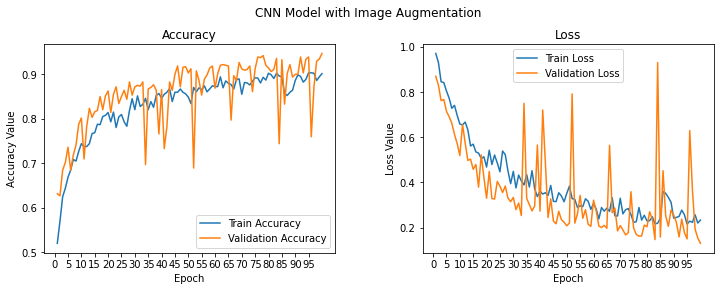

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Model with Image Augmentation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)
 
epoch_list = list(range(1,epochs+1))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, epochs, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")
 
ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, epochs, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

## Save Model

In [ ]:
model.save('model')

In [ ]:
!zip -r /content/ICBB_lung-cancer_model.zip /content/model/


updating: content/model/ (stored 0%)
updating: content/model/keras_metadata.pb (deflated 92%)
updating: content/model/saved_model.pb (deflated 89%)
updating: content/model/assets/ (stored 0%)
updating: content/model/variables/ (stored 0%)
updating: content/model/variables/variables.index (deflated 67%)
updating: content/model/variables/variables.data-00000-of-00001 (deflated 31%)


In [ ]:
from google.colab import files

files.download("/content/ICBB_lung-cancer_model.zip")

## Load Model

In [ ]:
from google.colab import files

uploaded_model = files.upload()

Saving ICBB_lung-cancer_model.zip to ICBB_lung-cancer_model.zip


In [ ]:
import zipfile

for fn in uploaded_model.keys():
  model_path = '/content/'+ fn
  with zipfile.ZipFile(model_path, 'r') as zip_ref:
    zip_ref.extractall('/')

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/model')

## Predict

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving gr2.jpg to gr2.jpg
Saving gr1.jpg to gr1.jpg


In [ ]:
file_name = []
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
  file_name.append(fn)

User uploaded file "gr2.jpg" with length 53946 bytes
User uploaded file "gr1.jpg" with length 37306 bytes


In [ ]:
import warnings 
warnings.filterwarnings('ignore')
import tensorflow.keras.preprocessing.image as image
 
def load_image(image_path):
  img = image.load_img(image_path, grayscale=True, target_size=(150, 150))
  img_tensor = image.img_to_array(img) 
  img_tensor = np.expand_dims(img_tensor, axis=0)
  img_tensor /= 255. 
  return img_tensor

for file in file_name:
  image_path = '/content/' + file

  try:
    print(file, 'probability: ', model.predict(load_image(image_path)))
    prediction = model.predict_classes(load_image(image_path))

    if prediction == 0:
      print("It's Benign\n")
    if prediction == 1:
      print("It's Malignant\n")
    if prediction == 2:
      print("It's Normal\n")

  except:
    print("Error!")

gr2.jpg probability:  [[0. 1. 0.]]
It's Malignant

gr1.jpg probability:  [[0. 1. 0.]]
It's Malignant

